# 1D NMR Processing and Display

a simplified environment for processing 1D Bruker NMR datasets with `SPIKE`

Run each python cell in sequence by using the ⇥Run button above (or typing *shift* Enter).

Cells are meant to be used in order, taking you to the complete analysis, but you can go back at any time.

#### *Remark*
*to use this program, you should have installed the following packages:*

- *a complete scientific python environment* ( *tested with python 3.6 - [anaconda](https://www.anaconda.com/)*)
- [`spike`](https://www.bitbucket.org/delsuc/spike) ( *version 0.99.9 minimum* )
- [`ipywidgets`](https://ipywidgets.readthedocs.io/en/latest/)  ( *tested with version 7.1* )

## Initialization
the following cell should be run only once, at the beginning of the processing

In [1]:
# load all python and interactive tools
from __future__ import print_function, division
%matplotlib notebook
import os.path as op
from IPython.display import display, HTML, Markdown
import spike
from spike.File.BrukerNMR import Import_1D
from spike.Interactive import INTER as I
from spike.Interactive.ipyfilechooser import FileChooser
display(Markdown('## Program is Ready'))


          SPIKE
    Version     : 0.99.9
    Date        : 02-05-2019
    Revision Id : 409
*** zoom3D not loaded because of an error ***
plugins loaded:
Bruker_NMR_FT,  Bucketing,  FTMS_calib,  Fitter,  Integrate,  Linear_prediction,  PALMA,  Peaks,  apmin,  bcorr,  bokeh_display,  fastclean,  gaussenh,  pg_sane,  rem_ridge,  sane,  sg,  test,  urQRd,  wavelet, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin


## Program is Ready

### Choose the file
The `FileChooser()` tool creates a dialog box which allows to choose a file on your disk

- use the `Select` button
- modify the ( *optional* ) `path` argument, to start the exploration on a given location
- After the selection, the selected filename is found in `FC.selected`

In [2]:
FC = FileChooser(path='/DATA/pharma/',filename='fid')
display(FC)

FileChooser(path='/DATA/pharma', filename='fid', show_hidden='False')

### Import dataset

This is simply done with the `Import_1D()` tool, which returns a `SPIKE` object.

We store the dataset into a variable, typing the variable name shows a summary of the dataset. 

Reading file  /DATA/pharma/ARTEref_161123/1/fid


<IPython.core.display.Javascript object>


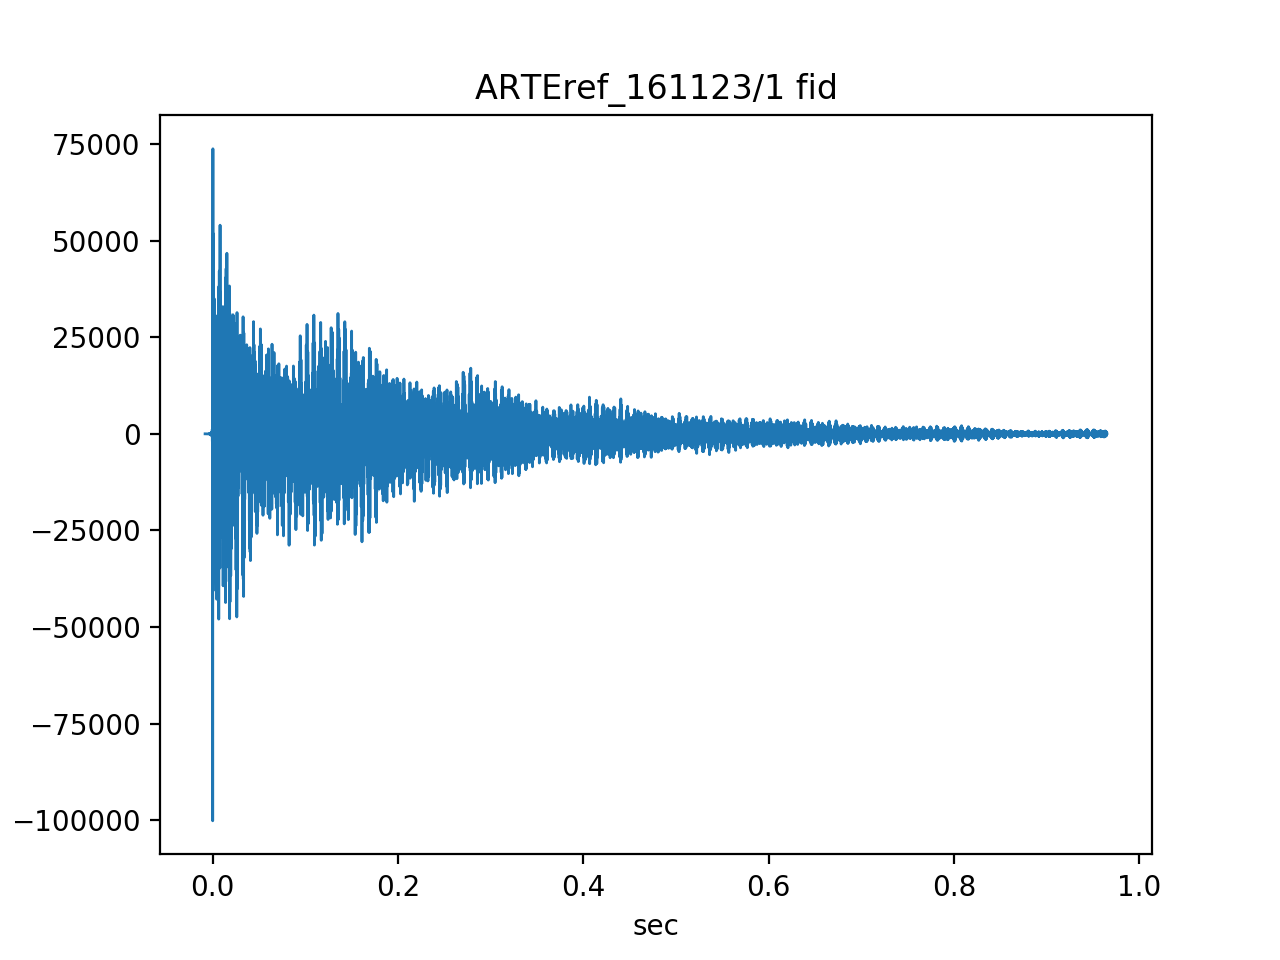

1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  8192 complex pairs,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is complex

In [3]:
print('Reading file ',FC.selected)
d1 = Import_1D(FC.selected)
d1.filename = FC.selected
d1.set_unit('sec').display(title=FC.nmrname+" fid")
d1

In the current set-up, the figure can be explored *(zoom, shift, resize, etc)* with the jupyter tools displayed  below the dataset.
The figure can also be saved as a `png` graphic file.

At anytime, the figure can be frozen by clicking on the blue button on the upper right corner, just rerun the cell for changing it.

## Basic Processing
We are going to use a basic processing set-up, check the documentation for advanced processing

### Fourier Transform

<IPython.core.display.Javascript object>


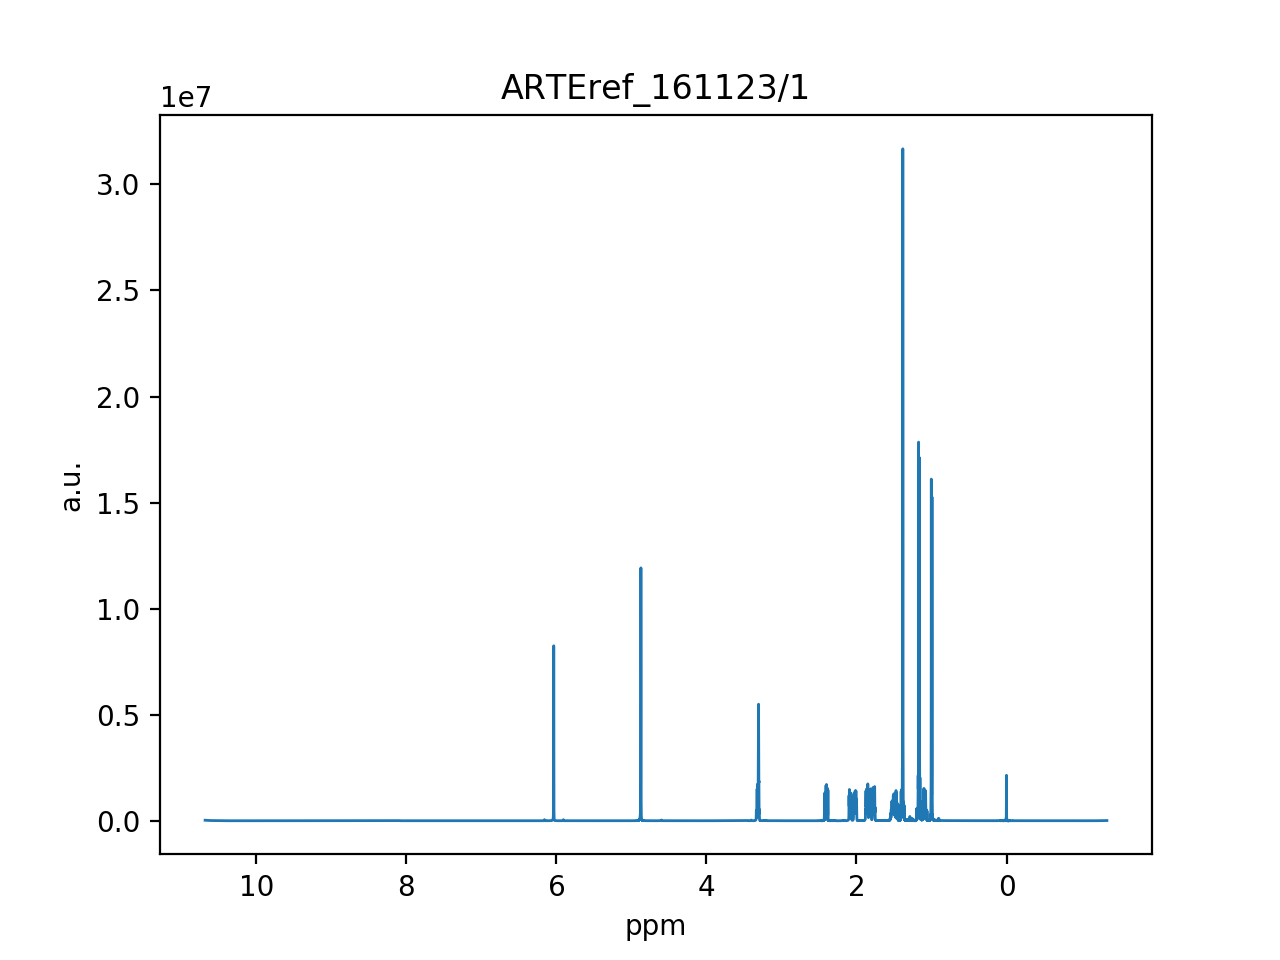

1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  32768 complex pairs,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is complex

In [23]:
D1 = d1.copy() # copy the imported data-set to another object for processing
D1.apod_em(0.3).zf(4).ft_sim().bk_corr().apmin()  # chaining  apodisation - zerofill - FT - Bruker correction - autophase
D1.set_unit('ppm').display(title=FC.nmrname)  # chain  set to ppm unit - and display

### rephasing
If is is required use the interactive phaser

Use `scale` and `zoom` to tune the display; then use `P0, P1, pivot` to optimize the phase.

Once finished, click on `Apply correction`

In [ ]:
I.Phaser1D(D1);

## Peak-Picker
- moving the threshold determines the minimum peak intensity
- peaks are searched only in the selected zoom window

Output(layout=Layout(border='1px solid black'))

Output(layout=Layout(border='1px solid red'))

<IPython.core.display.Javascript object>


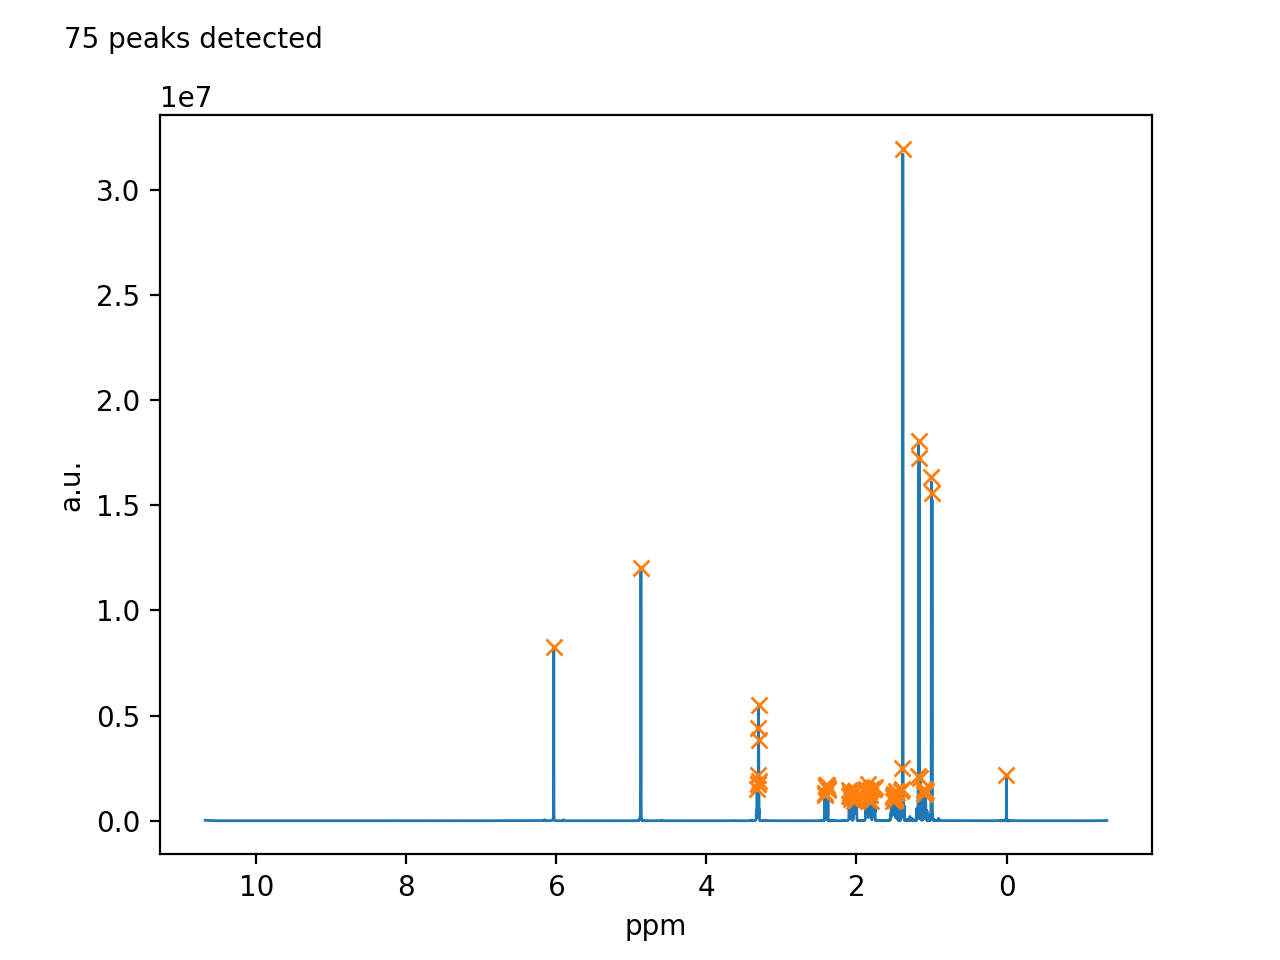

In [27]:
from importlib import reload
reload(I)
I.NMRPeaker(D1);

## Integrate
Integration zones are computed from the peaks detected with the Peak-Picker above.


Output(layout=Layout(border='1px solid black'))

Output(layout=Layout(border='1px solid red'))

<IPython.core.display.Javascript object>


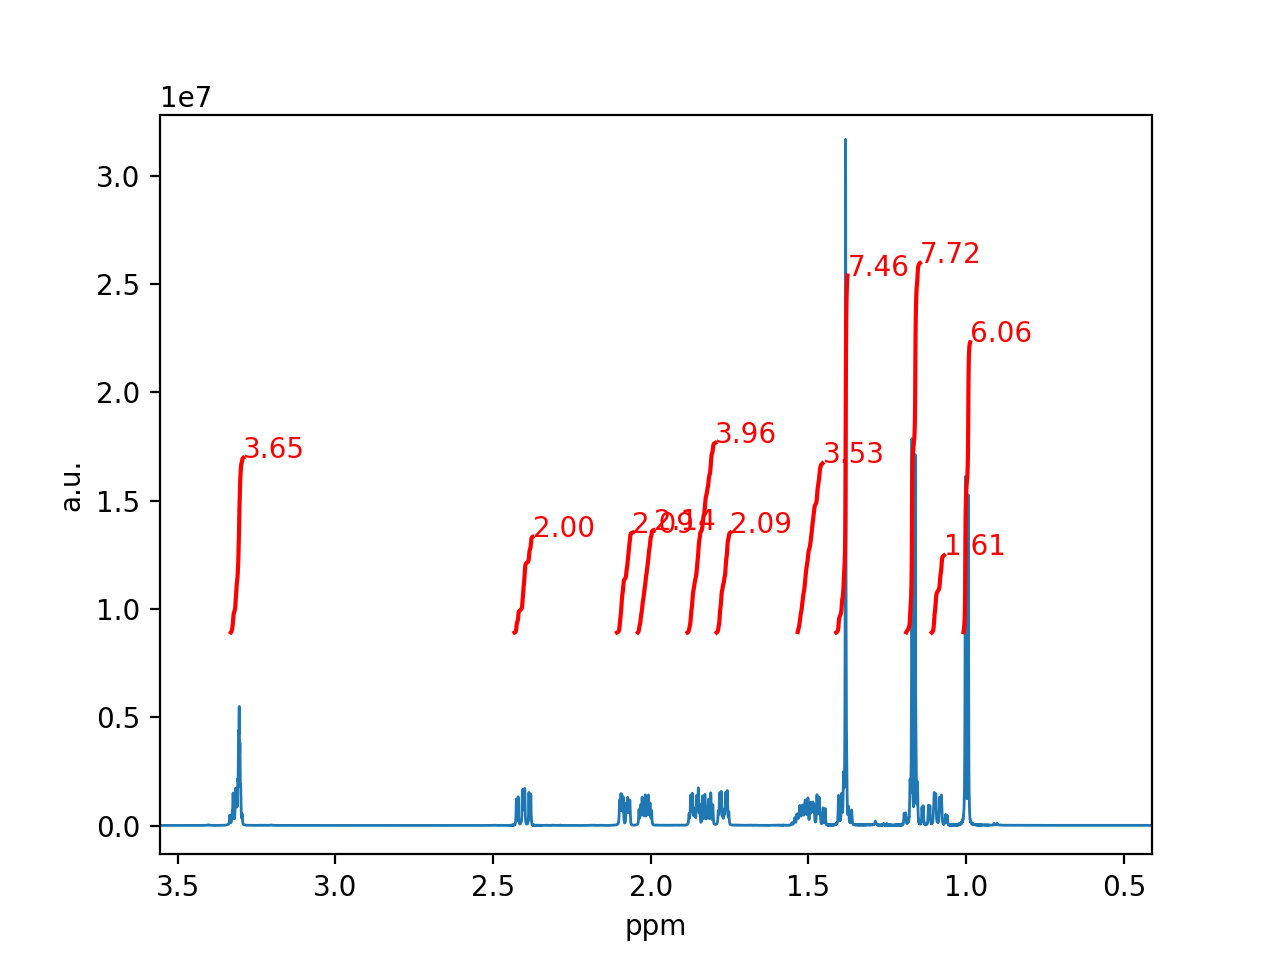

In [28]:
reload(I)
I.NMRIntegrate(D1);

## Interactive composite display
Convinient to set-up your own figure

<IPython.core.display.Javascript object>


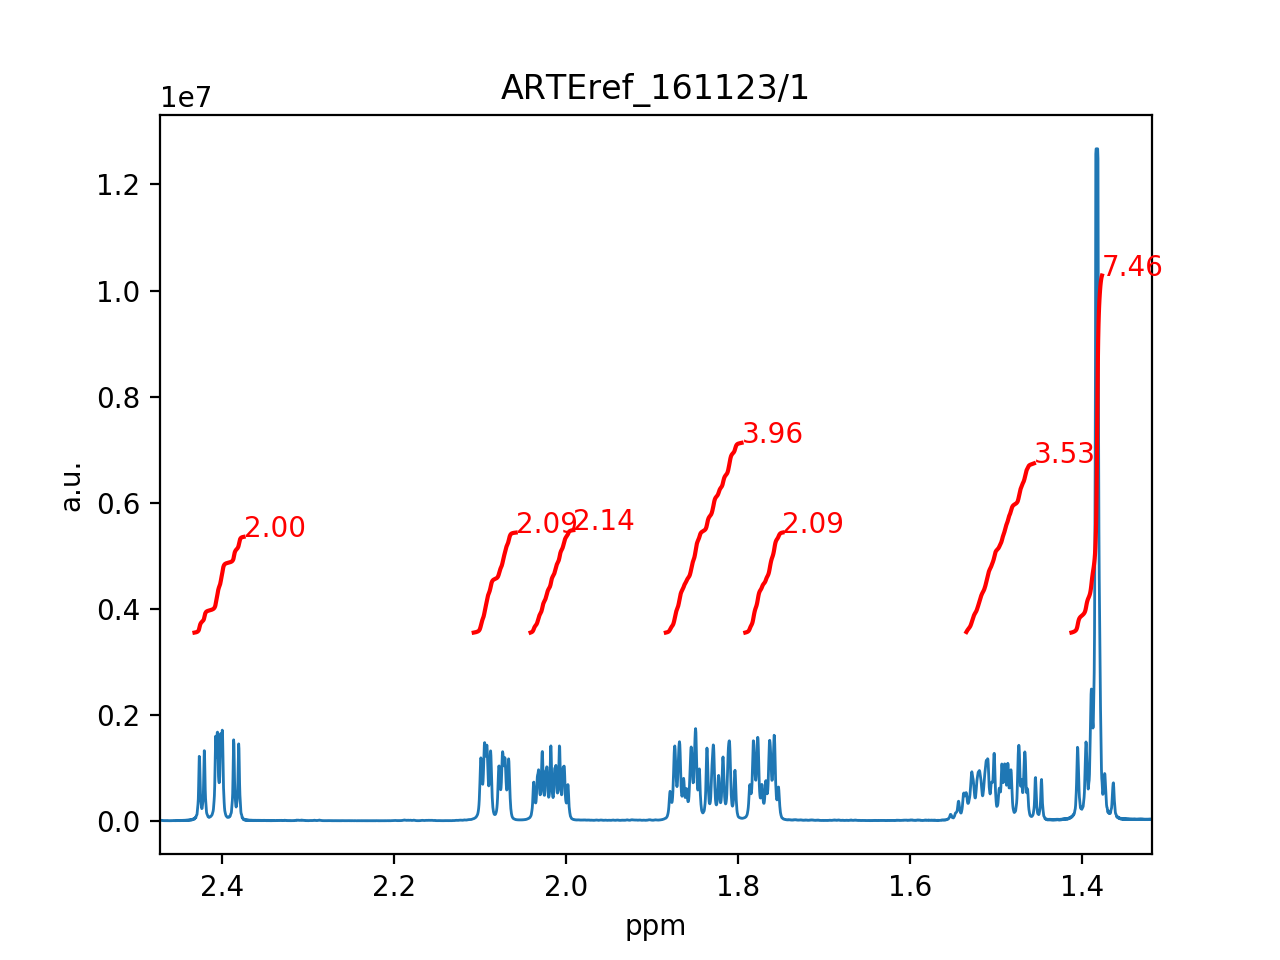

In [30]:
reload(I)
I.Show1D(D1,title=FC.nmrname)

## Save the data-set
either as stand alone native SPIKE files, (there are other formats)

In [29]:
D1.save('example1.gs1')

1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  32768 real points,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is real

or as a `csv` text file, - in which case, it is probably better to remove the imaginary part, not useful there.

The file contains some basic informations in addition to the spectral data

In [18]:
D1.copy().real().save_csv('example.csv')

1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  32768 real points,  from -1.338538 ppm (-937.194868 Hz) to 10.683670 ppm  (7480.313549 Hz)
data-set is real

### Save the peak list to a csv file

In [14]:
D1.pk2pandas().to_csv('peaklist.csv')

### Save the integrals to a csv file

In [13]:
D1.int2pandas().to_csv('integrals.csv')

#### todo
- better interactive zoom
- better saving

### *To come soon !*
## Spectral superimposition


In [ ]:
pk = list(range(10))
pk

In [ ]:
list(filter(lambda p:p%2,pk))

In [ ]:
filter?